In [1]:
import duckdb
from Metadata.DS_10283_3647.coding.coding.API.IdealDataInterface import IdealDataInterface
from Metadata.DS_10283_3647.coding.coding.API.IdealMetadataInterface import IdealMetadataInterface
import polars as pl
import pandas as pd
import path

In [2]:
HS_p=path.Path("Data/Parquet/room_and_appliance_sensors/sensordata")
RA_p=path.Path("Data/Parquet/household_sensors/sensordata")
IdealHS=IdealDataInterface("Data/CSV/room_and_appliance_sensors/sensordata").sensorid_mapping
Ideal_RA=IdealDataInterface("Data/CSV/household_sensors/sensordata").sensorid_mapping
IdealHS['Folder_Path']= HS_p
Ideal_RA['Folder_Path']= RA_p

Found entries for 4824 sensor readings.
Found entries for 1592 sensor readings.


In [3]:
Ideal=pd.concat([IdealHS ,Ideal_RA])

In [4]:
sensorid_parquet = Ideal.copy()
sensorid_parquet['filename'] = sensorid_parquet['filename'].str.replace(r'\.csv\.gz$', '.parquet', regex=True)
sensorid_parquet

filename  \
homeid roomid room_type category            subtype           sensorid                                                         
105    1110   kitchen   electric-appliance  kettle            5283         home105_kitchen1110_sensor5283_electric-applia...   
                                            fridgefreezer     5284         home105_kitchen1110_sensor5284_electric-applia...   
                                            washingmachine    5285         home105_kitchen1110_sensor5285_electric-applia...   
                                            microwave         5286         home105_kitchen1110_sensor5286_electric-applia...   
                                            dishwasher        5287         home105_kitchen1110_sensor5287_electric-applia...   
...                                                                                                                      ...   
90     1084   utility   electric-subcircuit mains             4865         home90_utility1084_sensor4865_electric-subcirc...   
96     1608   utility   electric-subcircuit cooker            9067         home96_utility1608_sensor9067_electric-subcirc...   
                                            mains             9068         home96_utility1608_sensor9068_electric-subcirc...   
287    2676   bedroom   electric-mains      electric-combined 18496c18492  home287_bedroom2676_sensor18496c18492_electric...   
97     1010   hall      electric-mains      electric-combined 4238c4242    home97_hall1010_sensor4238c4242_electric-mains...   

                                                                                                                 Folder_Path  
homeid roomid room_type category            subtype           sensorid                                                        
105    1110   kitchen   electric-appliance  kettle            5283         Data/Parquet/room_and_appliance_sensors/sensor...  
                                            fridgefreezer     5284         Data/Parquet/room_and_appliance_sensors/sensor...  
                                            washingmachine    5285         Data/Parquet/room_and_appliance_sensors/sensor...  
                                            microwave         5286         Data/Parquet/room_and_appliance_sensors/sensor...  
                                            dishwasher        5287         Data/Parquet/room_and_appliance_sensors/sensor...  
...                                                                                                                      ...  
90     1084   utility   electric-subcircuit mains             4865                 Data/Parquet/household_sensors/sensordata  
96     1608   utility   electric-subcircuit cooker            9067                 Data/Parquet/household_sensors/sensordata  
                                            mains             9068                 Data/Parquet/household_sensors/sensordata  
287    2676   bedroom   electric-mains      electric-combined 18496c18492          Data/Parquet/household_sensors/sensordata  
97     1010   hall      electric-mains      electric-combined 4238c4242            Data/Parquet/household_sensors/sensordata  

[6416 rows x 2 columns]

In [5]:
sensorid_parquet['filename'].str.contains('.csv', regex=False).any()


np.False_

In [6]:
#Ideal.categories().to_csv('Data/NAV/Categories_nav.csv',index=False)
sensorid_parquet.to_csv('Data/NAV/SensorID_mapping_nav.csv')

In [7]:
# duckdb.query("""
#     SELECT *
#     FROM 'Data/NAV/Categories_nav.csv' 
# """) 

In [8]:
duckdb.query("""
    SELECT filename
    FROM 'Data/NAV/SensorID_mapping_nav.csv'
    where 
    category= 'room' and subtype = 'temperature'     
""") 

┌────────────────────────────────────────────────────────────┐
│                          filename                          │
│                          varchar                           │
├────────────────────────────────────────────────────────────┤
│ home100_bedroom1041_sensor4491_room_temperature.parquet    │
│ home100_bedroom1042_sensor4496_room_temperature.parquet    │
│ home100_hall1039_sensor4486_room_temperature.parquet       │
│ home100_kitchen1037_sensor4463_room_temperature.parquet    │
│ home100_livingroom1038_sensor4474_room_temperature.parquet │
│ home100_livingroom1043_sensor4501_room_temperature.parquet │
│ home101_bathroom1049_sensor4554_room_temperature.parquet   │
│ home101_bedroom1050_sensor4559_room_temperature.parquet    │
│ home101_bedroom1051_sensor4564_room_temperature.parquet    │
│ home101_hall1045_sensor4544_room_temperature.parquet       │
│                          ·                                 │
│                          ·                           

<Axes: >

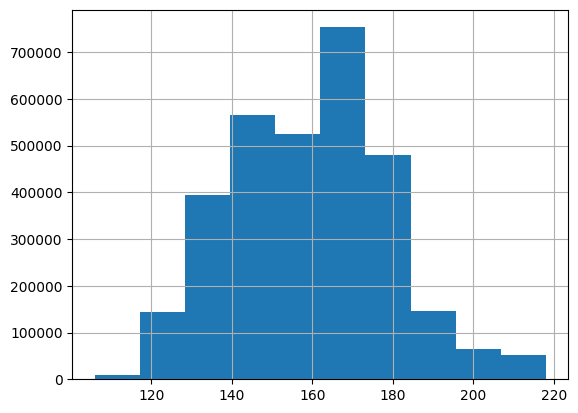

In [9]:
duckdb.query(""" select * from 'Data/Parquet/room_and_appliance_sensors/sensordata/home100_bedroom1041_sensor4491_room_temperature.parquet' """).to_df()['146'].hist()

In [10]:
import pandas as pd

df=pd.read_csv("Metadata/DS_10283_3647/metadata_and_surveys/metadata/sensorbox.csv")
df2=pd.read_csv("Metadata/DS_10283_3647/metadata_and_surveys/metadata/tariff.csv")

In [11]:
279492261292874
279492261293041
279492261293041
167

167

In [12]:
df2[df2['energytype'] == 'electricity']

,homeid,notification_date,provenancedetail,energytype,daily_standing_charge_pence,unit_charge_pence_per_kwh
0,167,2016-08-25,primary_facetoface_initial,electricity,23.02,NaN
1,62,2016-08-26,primary_facetoface_initial,electricity,31.31,NaN
3,61,2016-10-06,primary_facetoface_initial,electricity,0.33,0.12
5,64,2016-10-20,primary_facetoface_initial,electricity,26.02,13.42
6,64,2016-10-20,in_app,electricity,26.00,13.41
...,...,...,...,...,...,...
555,251,2018-05-31,in_app,electricity,32.00,12.13
557,319,2018-05-31,in_app,electricity,24.00,14.77
558,319,2018-05-31,in_app,electricity,21.00,14.07
559,319,2018-05-31,in_app,electricity,22.00,14.07


In [13]:
df
df[df['applianceid']==0].shape[0]/df.shape[0]

0.93726754277213

In [14]:
a=df.sort_values(by='applianceid', ascending=True, inplace=True)
a

In [15]:
df

,sensorboxid,local_id,roomid,status,sensorbox_type,notes,heightfromfloor,name,onMainThermostat,temperatureInaccuracy,...,clamp1pipe,clamp2pipe,gasblock,installtime,applianceid,hasTRV,clamp1detail,clamp2detail,oven,function
0,279492261292874,1,650,active,room,Behind door.,157,NaN,0,0,...,NaN,NaN,NaN,1470819942,0,NaN,NaN,NaN,NaN,NaN
2640,279492261295488,6,2236,active,gas,NaN,0,NaN,0,0,...,NaN,NaN,Square,1510046442,0,NaN,NaN,NaN,NaN,NaN
2641,279492261295489,7,2237,active,room,NaN,190,NaN,0,0,...,NaN,NaN,NaN,1510046603,0,NaN,NaN,NaN,NaN,NaN
2642,279492261295490,8,2238,active,room,NaN,195,NaN,0,0,...,NaN,NaN,NaN,1510046863,0,NaN,NaN,NaN,NaN,NaN
2643,279492261295493,1,2239,active,room,NaN,122,NaN,0,0,...,NaN,NaN,NaN,1510059789,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,279492261297138,102,2488,active,plug_monitor,NaN,0,Combined Fridge/Freezer,0,0,...,NaN,NaN,NaN,0,5654,NaN,NaN,NaN,NaN,NaN
3205,279492261297149,109,2485,active,plug_monitor,NaN,0,portable Oil Heater,0,0,...,NaN,NaN,NaN,0,5655,NaN,NaN,NaN,NaN,NaN
3206,279492261297150,110,2485,active,plug_monitor,NaN,0,Vacuum Cleaner,0,0,...,NaN,NaN,NaN,0,5656,NaN,NaN,NaN,NaN,NaN
3727,279492261297158,102,2857,active,plug_monitor,NaN,0,Vacuum Cleaner,0,0,...,NaN,NaN,NaN,0,5657,NaN,NaN,NaN,NaN,NaN


In [16]:
pd.DataFrame(df['applianceid'].unique()).sort_values(by=0)

,0
0,0
1,937
2,940
3,942
4,943
...,...
237,5654
238,5655
239,5656
240,5657


In [17]:
duckdb.query("""SELECT * from 'Data/NAV/appliance.csv' where powertype = 'electric'""")

┌─────────────┬────────┬────────┬────────────────┬───────────┬────────────────┬───────────────────────┬────────┐
│ applianceid │ homeid │ roomid │ applianceclass │ powertype │ appliancetype  │   appliancesubtype    │ number │
│    int64    │ int64  │ int64  │    varchar     │  varchar  │    varchar     │        varchar        │ int64  │
├─────────────┼────────┼────────┼────────────────┼───────────┼────────────────┼───────────────────────┼────────┤
│         908 │     47 │    650 │ food           │ electric  │ fridgefreezer  │ combinedFridgeFreezer │      1 │
│         909 │     47 │    650 │ food           │ electric  │ grill          │ grill                 │      1 │
│         910 │     47 │    650 │ food           │ electric  │ toaster        │ toaster               │      1 │
│         911 │     47 │    650 │ food           │ electric  │ kettle         │ kettle                │      1 │
│         912 │     47 │    650 │ food           │ electric  │ electricoven   │ electricOven    

In [18]:
duckdb.query("""
    SELECT a.*, sb.*, s.*
    FROM 'Data/NAV/sensor.csv' AS s
    LEFT JOIN 'Data/NAV/sensorbox.csv' AS sb
        ON s.sensorboxid = sb.sensorboxid
    LEFT JOIN 'Data/NAV/appliance.csv' AS a
        ON sb.applianceid = a.applianceid
    WHERE a.powertype = 'electric'
""").to_table('APPL_SNSR_SNSRBOX')

In [19]:
duckdb.query("""
    SELECT *
    from 'Data/NAV/appliance.csv'
    WHERE applianceid = 0
""").to_df()

,applianceid,homeid,roomid,applianceclass,powertype,appliancetype,appliancesubtype,number


In [20]:
duckdb.query("""
    SELECT a.*, sb.*, s.*
    FROM 'Data/NAV/sensor.csv' AS s
    LEFT JOIN 'Data/NAV/sensorbox.csv' AS sb
        ON s.sensorboxid = sb.sensorboxid
    LEFT JOIN 'Data/NAV/appliance.csv' AS a
        ON sb.applianceid = a.applianceid
    where a.applianceid is null
""").to_df()

,applianceid,homeid,roomid,applianceclass,powertype,appliancetype,appliancesubtype,number,sensorboxid,local_id,...,sensorid,sensorboxid_1,type,unit,status_1,roomid_2,subcircuit_type,scalingfactor,rawunit,counter
0,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261292874,1,...,1174,279492261292874,light,0.1cd,active,650,None,1.0,None,1
1,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261292874,1,...,1175,279492261292874,humidity,0.1%,active,650,None,1.0,None,1
2,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261292874,1,...,1176,279492261292874,temperature,0.1C,active,650,None,1.0,None,1
3,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261292874,1,...,1177,279492261292874,battery,0.01V,active,650,None,1.0,None,1
4,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261292874,1,...,1178,279492261292874,battery,0.01V,active,650,None,1.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261297010,12,...,21843,279492261297010,humidity,0.1%,active,3026,None,1.0,None,1
19858,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261297010,12,...,21844,279492261297010,temperature,0.1C,active,3026,None,1.0,None,1
19859,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261297010,12,...,21845,279492261297010,battery,0.01V,active,3026,None,1.0,None,1
19860,<NA>,<NA>,<NA>,None,None,None,None,<NA>,279492261297010,12,...,21846,279492261297010,battery,0.01V,active,3026,None,1.0,None,2


In [21]:
duckdb.query("""
    SELECT homeid,count(*) as appliance_count
    FROM APPL_SNSR_SNSRBOX 
    Group by homeid""")

┌────────┬─────────────────┐
│ homeid │ appliance_count │
│ int64  │      int64      │
├────────┼─────────────────┤
│     61 │               3 │
│     62 │               5 │
│     63 │               5 │
│     65 │               6 │
│     73 │               3 │
│     90 │               3 │
│     96 │               6 │
│    105 │               6 │
│    106 │               4 │
│    128 │               7 │
│     ·  │               · │
│     ·  │               · │
│     ·  │               · │
│    255 │               6 │
│    259 │               8 │
│    262 │               4 │
│    263 │               6 │
│    264 │               7 │
│    266 │               5 │
│    268 │               6 │
│    276 │               7 │
│    311 │               7 │
│    328 │               5 │
├────────┴─────────────────┤
│    39 rows (20 shown)    │
└──────────────────────────┘

In [22]:
duckdb.query("""
    SELECT * from APPL_SNSR_SNSRBOX where homeid = 61""")

┌─────────────┬────────┬────────┬────────────────┬───────────┬───────────────┬──────────────────┬────────┬─────────────────┬──────────┬──────────┬─────────┬────────────────┬─────────┬─────────────────┬─────────────────┬──────────────────┬───────────────────────┬────────────────────┬─────────────────┬──────────────┬──────────────┬────────────┬────────────┬──────────┬─────────────┬───────────────┬────────┬──────────────┬──────────────┬─────────┬──────────┬──────────┬─────────────────┬─────────────────┬─────────┬──────────┬──────────┬─────────────────┬───────────────┬─────────┬─────────┐
│ applianceid │ homeid │ roomid │ applianceclass │ powertype │ appliancetype │ appliancesubtype │ number │   sensorboxid   │ local_id │ roomid_1 │ status  │ sensorbox_type │  notes  │ heightfromfloor │      name       │ onMainThermostat │ temperatureInaccuracy │ humidityInaccuracy │ lightInaccuracy │ install_type │ currentrange │ clamp1pipe │ clamp2pipe │ gasblock │ installtime │ applianceid_1 │ hasTRV │ 

Data\Parquet\household_sensors\sensordata\home61_utility1109_sensor5071_electric-subcircuit_mains.parquet

Data\Parquet\household_sensors\sensordata\home61_hall693_sensor1563c1569_electric-mains_electric-combined.parquet

In [23]:
duckdb.query("""
    SELECT *  FROM
'Data/Parquet/household_sensors/sensordata/home61_utility1109_sensor5071_electric-subcircuit_mains.parquet' 
    """)

┌─────────────────────┬───────┐
│ 2017-04-24 14:30:01 │  41   │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ 2017-04-24 14:30:06 │    41 │
│ 2017-04-24 14:30:12 │    40 │
│ 2017-04-24 14:30:17 │    40 │
│ 2017-04-24 14:30:22 │    40 │
│ 2017-04-24 14:30:28 │    40 │
│ 2017-04-24 14:30:33 │    40 │
│ 2017-04-24 14:30:38 │    40 │
│ 2017-04-24 14:30:44 │    41 │
│ 2017-04-24 14:30:49 │    40 │
│ 2017-04-24 14:30:54 │    40 │
│          ·          │     · │
│          ·          │     · │
│          ·          │     · │
│ 2017-04-25 05:21:58 │   173 │
│ 2017-04-25 05:22:03 │   173 │
│ 2017-04-25 05:22:09 │   171 │
│ 2017-04-25 05:22:14 │   172 │
│ 2017-04-25 05:22:19 │   172 │
│ 2017-04-25 05:22:25 │   174 │
│ 2017-04-25 05:22:30 │   174 │
│ 2017-04-25 05:22:35 │   171 │
│ 2017-04-25 05:22:41 │   171 │
│ 2017-04-25 05:22:46 │   174 │
├─────────────────────┴───────┤
│ ? rows            2 columns │
└─────────────────────────────┘

In [24]:
duckdb.query("""
    SELECT *  FROM
'Data/Parquet/household_sensors/sensordata/home61_hall693_sensor1563c1569_electric-mains_electric-combined.parquet' """)

┌─────────────────────┬───────┐
│ 2016-10-06 12:30:37 │   0   │
│       varchar       │ int64 │
├─────────────────────┼───────┤
│ 2016-10-06 12:30:38 │   247 │
│ 2016-10-06 12:30:39 │   247 │
│ 2016-10-06 12:30:40 │   247 │
│ 2016-10-06 12:30:41 │   247 │
│ 2016-10-06 12:30:42 │   250 │
│ 2016-10-06 12:30:43 │   247 │
│ 2016-10-06 12:30:44 │   247 │
│ 2016-10-06 12:30:45 │   247 │
│ 2016-10-06 12:30:46 │   255 │
│ 2016-10-06 12:30:47 │   247 │
│          ·          │     · │
│          ·          │     · │
│          ·          │     · │
│ 2016-10-06 15:22:09 │    87 │
│ 2016-10-06 15:22:10 │    90 │
│ 2016-10-06 15:22:11 │    90 │
│ 2016-10-06 15:22:12 │    90 │
│ 2016-10-06 15:22:13 │    92 │
│ 2016-10-06 15:22:14 │   112 │
│ 2016-10-06 15:22:15 │    97 │
│ 2016-10-06 15:22:16 │    92 │
│ 2016-10-06 15:22:17 │    99 │
│ 2016-10-06 15:22:18 │    92 │
├─────────────────────┴───────┤
│ ? rows            2 columns │
└─────────────────────────────┘

In [25]:
duckdb.query(""" 
select * from 'Data/NAV/SensorID_mapping_nav.csv'

""")

┌────────┬────────┬───────────┬─────────────────────┬───────────────────┬─────────────┬────────────────────────────────────────────────────────────────────────────────┬────────────────────────────────────────────────────┐
│ homeid │ roomid │ room_type │      category       │      subtype      │  sensorid   │                                    filename                                    │                    Folder_Path                     │
│ int64  │ int64  │  varchar  │       varchar       │      varchar      │   varchar   │                                    varchar                                     │                      varchar                       │
├────────┼────────┼───────────┼─────────────────────┼───────────────────┼─────────────┼────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────┤
│    105 │   1110 │ kitchen   │ electric-appliance  │ kettle            │ 5283        │ home105_kitchen1110_sens

In [26]:
duckdb.query("""
    SELECT a.*, sb.*, s.*
    FROM 'Data/NAV/sensor.csv' AS s
    LEFT JOIN 'Data/NAV/sensorbox.csv' AS sb
        ON s.sensorboxid = sb.sensorboxid
    LEFT JOIN 'Data/NAV/appliance.csv' AS a
        ON sb.applianceid = a.applianceid
    WHERE a.powertype = 'electric'
""")#.to_table('APPL_SNSR_SNSRBOX')

┌─────────────┬────────┬────────┬────────────────┬───────────┬────────────────┬───────────────────────┬────────┬─────────────────┬──────────┬────────┬─────────┬────────────────┬─────────┬─────────────────┬───────────────────────┬──────────────────┬───────────────────────┬────────────────────┬─────────────────┬──────────────┬──────────────┬────────────┬────────────┬──────────┬─────────────┬─────────────┬────────┬──────────────┬──────────────┬─────────┬──────────┬──────────┬─────────────────┬─────────────────┬─────────┬─────────┬────────┬─────────────────┬───────────────┬─────────┬─────────┐
│ applianceid │ homeid │ roomid │ applianceclass │ powertype │ appliancetype  │   appliancesubtype    │ number │   sensorboxid   │ local_id │ roomid │ status  │ sensorbox_type │  notes  │ heightfromfloor │         name          │ onMainThermostat │ temperatureInaccuracy │ humidityInaccuracy │ lightInaccuracy │ install_type │ currentrange │ clamp1pipe │ clamp2pipe │ gasblock │ installtime │ appliancei

In [27]:
# W b czyli sensorbox ma byc sensorbox_type = electric,  
# Suma dla wszystkich sensorów ktorych nie ma w applince , d.sensorid, d.unit 
# d sensor sensor.id, unir

duckdb.query(""" 
SELECT 
    a.homeid,
    b.roomid,
    b.type,
    c.sensorboxid,
    c.sensorbox_type,
    d.sensorid,
    d.unit,
    g.applianceid,
    h.filename,
    h.Folder_Path
FROM 'Data/NAV/home.csv' AS a
LEFT JOIN 'Data/NAV/room.csv' AS b
    ON a.homeid = b.homeid
LEFT JOIN 'Data/NAV/sensorbox.csv' AS c
    ON b.roomid = c.roomid
LEFT JOIN 'Data/NAV/sensor.csv' AS d
    ON c.sensorboxid = d.sensorboxid
LEFT JOIN APPL_SNSR_SNSRBOX AS g
    ON c.sensorboxid = g.sensorboxid AND d.sensorid = g. sensorid and g.applianceid = c.applianceid
LEFT JOIN 'Data/NAV/SensorID_mapping_nav.csv' AS h
    ON 
        CAST(d.sensorid AS TEXT) = CAST(h.sensorid AS TEXT)
        AND a.homeid = h.homeid
        AND b.roomid = h.roomid

Order by a.homeid, b.roomid, c.sensorboxid, d.sensorid

""")


┌────────┬────────┬─────────┬─────────────────┬────────────────┬──────────┬─────────┬─────────────┬───────────────────────────────────────────────────────────────────────┬────────────────────────────────────────────────────┐
│ homeid │ roomid │  type   │   sensorboxid   │ sensorbox_type │ sensorid │  unit   │ applianceid │                               filename                                │                    Folder_Path                     │
│ int64  │ int64  │ varchar │      int64      │    varchar     │  int64   │ varchar │    int64    │                                varchar                                │                      varchar                       │
├────────┼────────┼─────────┼─────────────────┼────────────────┼──────────┼─────────┼─────────────┼───────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────┤
│     47 │    650 │ kitchen │ 279492261292874 │ room           │     1174 │ 0.1cd   │        NULL │ 

In [33]:
duckdb.query("""
    SELECT
        homeid,

        -- number of males and females
        COUNT(*) FILTER (WHERE LOWER(gender) = 'male') AS num_males,
        COUNT(*) FILTER (WHERE LOWER(gender) = 'female') AS num_females,

        -- total residents = males + females
        COUNT(*) FILTER (WHERE LOWER(gender) IN ('male', 'female')) AS num_residents,

        -- children: age group up to and including 19
        COUNT(*) FILTER (
            WHERE ageband IN ('0-4', '5-9', '10-14', '15-19')
        ) AS num_children,

        -- employed: based on workingstatus
        COUNT(*) FILTER (
            WHERE workingstatus IN ('Paid work', 'Self-employed')
        ) AS num_employed,

        -- higher education: Degree or PhD
        COUNT(*) FILTER (
            WHERE education IN (
                'Degree level qualification (or equivalent), e.g. BSc, BA, MSc, MA',
                'PhD'
            )
        ) AS num_with_higher_education

    FROM 'Data/NAV/person.csv'
    GROUP BY homeid
""").to_table('PERSONAL_DATA_HOMEID')


In [34]:
duckdb.query("""
    SELECT *
    FROM (
        SELECT *,
               ROW_NUMBER() OVER (
                   PARTITION BY homeid 
                   ORDER BY notification_date DESC
               ) AS rn
        FROM 'Data/NAV/tariff.csv'
        WHERE LOWER(energytype) = 'electricity'
    ) 
    WHERE rn = 1
    order by homeid
""").to_table('LATEST_TARIFF_ELECTRICITY')

In [30]:
duckdb.query("""
    SELECT * from 'Data/NAV/SensorID_mapping_nav.csv' """)

┌────────┬────────┬───────────┬─────────────────────┬───────────────────┬─────────────┬────────────────────────────────────────────────────────────────────────────────┬────────────────────────────────────────────────────┐
│ homeid │ roomid │ room_type │      category       │      subtype      │  sensorid   │                                    filename                                    │                    Folder_Path                     │
│ int64  │ int64  │  varchar  │       varchar       │      varchar      │   varchar   │                                    varchar                                     │                      varchar                       │
├────────┼────────┼───────────┼─────────────────────┼───────────────────┼─────────────┼────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────┤
│    105 │   1110 │ kitchen   │ electric-appliance  │ kettle            │ 5283        │ home105_kitchen1110_sens

In [31]:
duckdb.query(""" select homeid, count(*) as n_rooms
            from 'Data/NAV/room.csv'
             group by homeid
             """).to_table('ROOMS_PER_HOME')

In [35]:
duckdb.query("""
    SELECT 
        a.applianceid,
        a.sensorboxid,
        a.sensorid, 
        a.unit,
        b.homeid,
        b.roomid,
        c.*,
        d.daily_standing_charge_pence,
        d.unit_charge_pence_per_kwh,
        f.filename,
        f.Folder_Path,
        g.n_rooms,
        h.smart_automation,
        h.hometype
    FROM APPL_SNSR_SNSRBOX AS a 
    LEFT JOIN 'Data/NAV/room.csv' AS b 
        ON a.roomid = b.roomid
    LEFT JOIN PERSONAL_DATA_HOMEID AS c
        ON b.homeid = c.homeid
    LEFT JOIN LATEST_TARIFF_ELECTRICITY AS d
        ON b.homeid = d.homeid
    LEFT JOIN 'Data/NAV/SensorID_mapping_nav.csv' AS f
        ON 
            CAST(a.sensorid AS TEXT) = CAST(f.sensorid AS TEXT)
            AND a.homeid = f.homeid
            AND b.roomid = f.roomid
    LEFT JOIN ROOMS_PER_HOME AS g
        ON b.homeid = g.homeid
    LEFT JOIN 'Data/NAV/home.csv' AS h
        ON b.homeid = h.homeid
    ORDER BY a.homeid, b.roomid, a.sensorboxid, a.sensorid
""").to_table('_WITH_METADATA')
# applianceid, sensorboxid, sensorid, unit,, homeid, roomid

colums_to_exclude = [
    'applianceid', 'sensorboxid', 'sensorid', 'unit', 
    'homeid', 'roomid', 'filename', 'Folder_Path'
]
df_metadata= duckdb.query("""
    SELECT * FROM _WITH_METADATA""").to_df()
df_metadata = df_metadata.drop(columns=colums_to_exclude)

In [36]:
df_metadata.to_csv('Data/NAV/Features_HomeID.csv', index=False)